# 3.2 Assignment: Using Data to Improve MLB Attendance

## DSC 630: Predictive Analytics

## June 20th, 2024

## Kenn Wade


# Introduction

## Overview

This notebook is part of my DSC 630 Predictive Analytics course assignment, where I am required to perform data analysis and visualization using Python. This assignment aims to analyze the attendance data of the Los Angeles Dodgers Major League Baseball (MLB) team and make recommendations to management on how to improve attendance. The analysis will involve exploring the provided dataset, identifying key factors that influence attendance, and developing a predictive model.

## Dataset Description

The given dataset, dodgers.csv, contains information on various factors related to the Los Angeles Dodgers games. These factors may include date, day of the week, opponent team, weather conditions, promotions, and attendance numbers. The goal is to use this data to uncover insights and patterns that can help increase attendance at Dodgers' games.

## Reason for the Assignment

This dataset was assigned as part of the course to provide a practical application of predictive analytics techniques in a real-world context. Analyzing sports data, particularly for a popular MLB team like the Los Angeles Dodgers, offers a unique opportunity to apply data science skills to a tangible problem. The open-ended nature of the assignment encourages creativity and critical thinking in the analysis process.

## Assignment Instructions

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make. You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all your code and to document your steps, process, and analysis.

For this assignment, I will perform the following steps using Python:
1. **Data Summary**: Provide a summary of the dataset and identify key questions to explore.
2. **Data Cleaning and Preparation**: Handle missing values, create new features, and prepare the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Visualize the data to understand distributions and relationships between variables.
4. **Statistical Analysis and Modeling**: Develop a regression model to predict attendance and evaluate its performance.
5. **Recommendations**: Based on the analysis, make recommendations to management on how to improve attendance.

## Questions to Explore

Based on the dataset, I will explore the following questions:
1. How does attendance vary by day of the week?
2. What is the impact of promotions on attendance?
3. How do weather conditions affect attendance?
4. Are there specific opponent teams that draw larger crowds?

By addressing these questions, I aim to provide actionable insights that can help the Los Angeles Dodgers management make informed decisions to enhance game attendance.


In [2]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/Users/kennwade/Downloads/dodgers-2022.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Indicate completion of Step 1
print("\nStep 1 completed: Dataset loaded successfully.")

First few rows of the dataset:
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO  

Step 1 completed: Dataset loaded successfully.


In [3]:
# Step 2: Display summary information about the dataframe
print("\nSummary information about the dataframe:")
print(df.info())

# Indicate completion of Step 2.1
print("\nStep 2.1 completed: Summary information displayed successfully.")


Summary information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
None

Step 2.1 completed: Summary information displayed successfully.


In [4]:
# Step 2.2: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Indicate completion of Step 2.2
print("\nStep 2.2 completed: Missing values check completed.")



Missing values in each column:
month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

Step 2.2 completed: Missing values check completed.


In [5]:
# Step 3.1: Convert data types if necessary and create new features

# Assuming no need to convert data types since all appear appropriate, 
# focus on creating new features like weekend indicator

# Create new feature: is_weekend
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Display the first few rows to verify new features
print("First few rows after adding new features:")
print(df.head())

# Indicate completion of Step 3.1
print("\nStep 3.1 completed: Data types checked and new features added.")


First few rows after adding new features:
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  is_weekend  
0        NO         NO           0  
1        NO         NO           0  
2        NO         NO           0  
3       YES         NO           0  
4        NO         NO           1  

Step 3.1 completed: Data types checked and new features added.


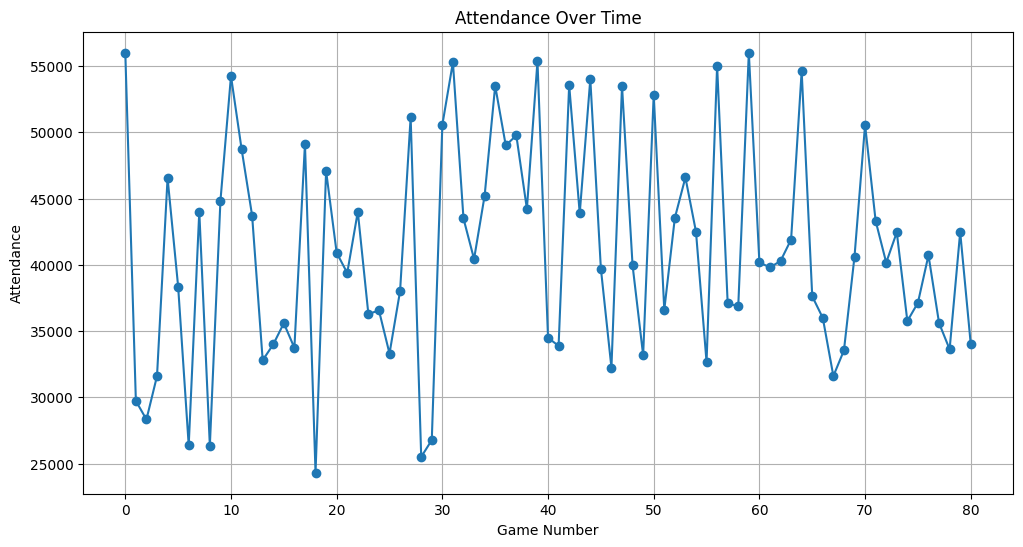


Step 4.1 completed: Attendance over time plotted.


In [6]:
import matplotlib.pyplot as plt

# Step 4.1: Plotting attendance over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['attend'], marker='o')
plt.title('Attendance Over Time')
plt.xlabel('Game Number')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

# Indicate completion of Step 4.1
print("\nStep 4.1 completed: Attendance over time plotted.")


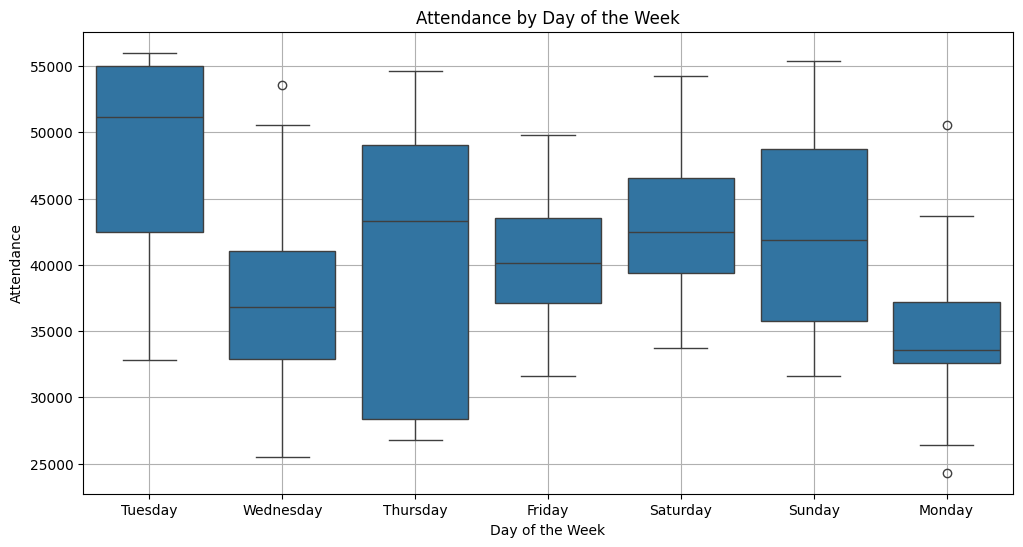


Step 4.2 completed: Attendance by day of the week plotted.


In [7]:
import seaborn as sns

# Step 4.2: Attendance by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='attend', data=df)
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

# Indicate completion of Step 4.2
print("\nStep 4.2 completed: Attendance by day of the week plotted.")


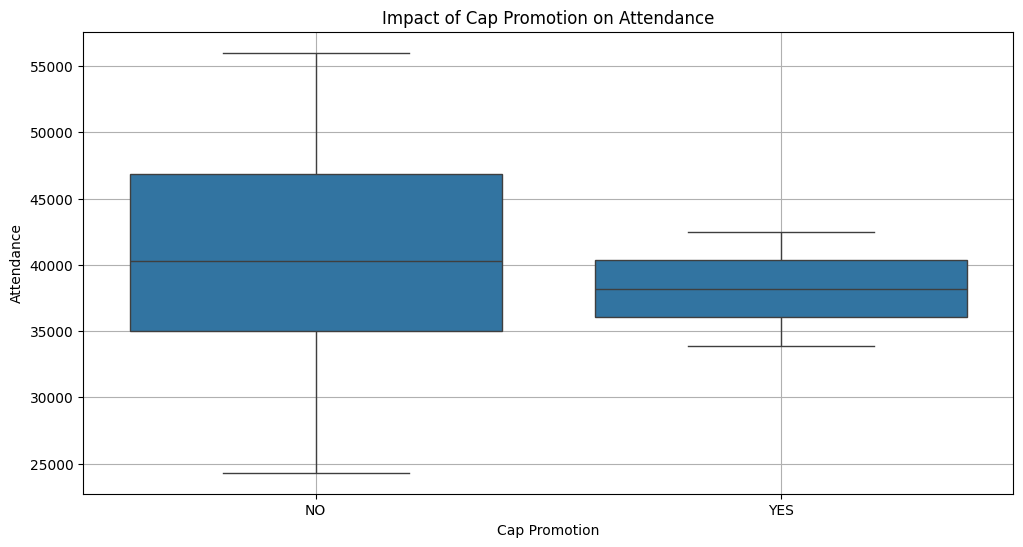

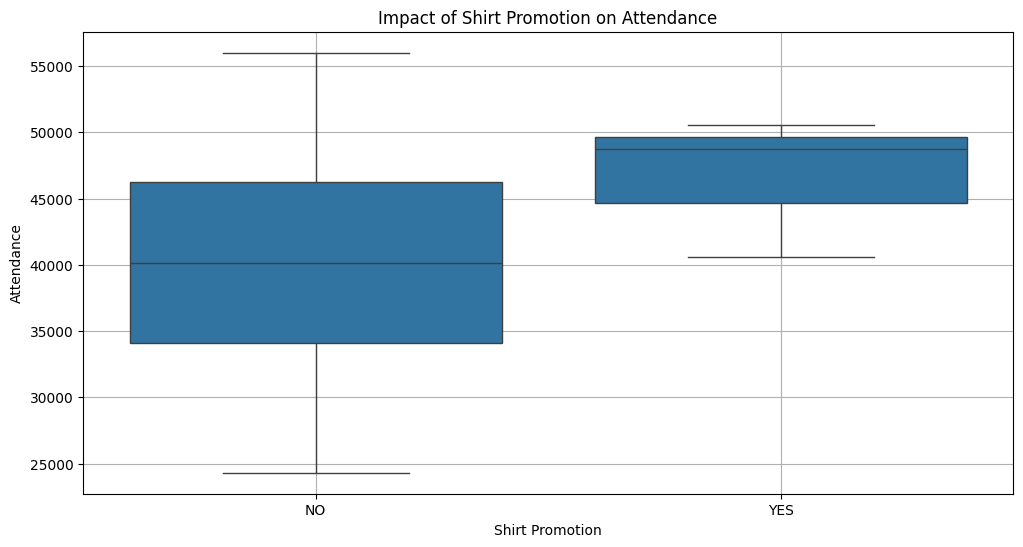

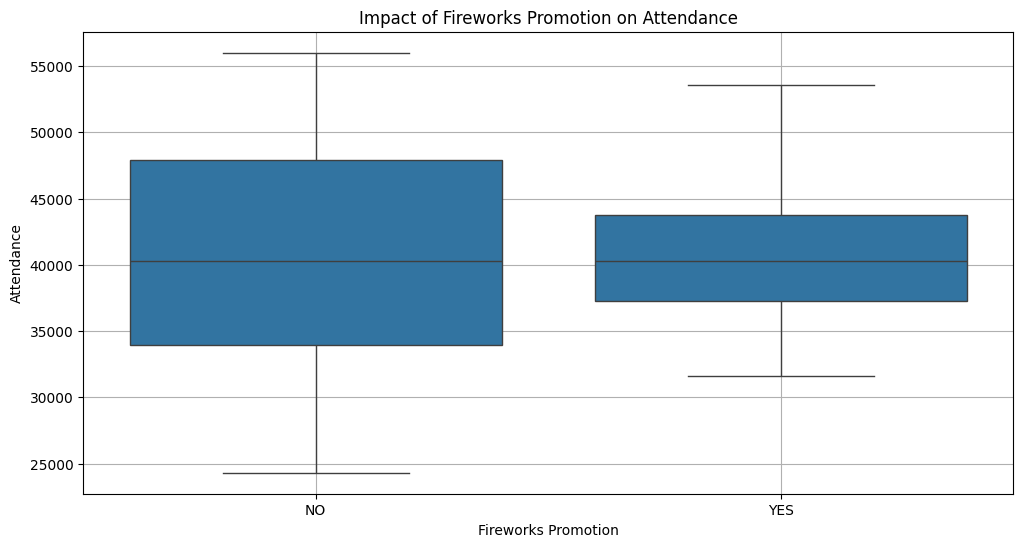

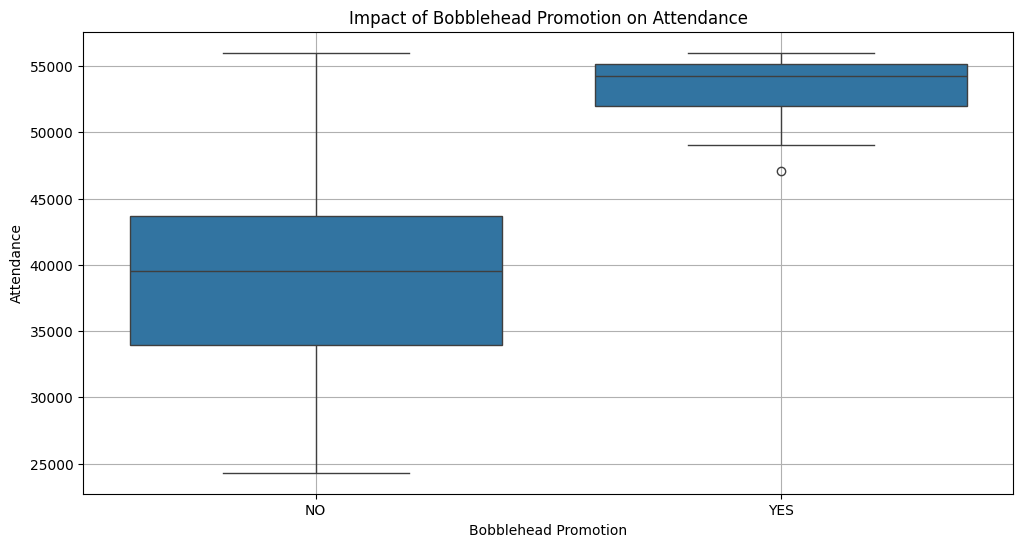


Step 4.3 completed: Impact of promotions on attendance analyzed.


In [8]:
# Step 4.3: Analyze the impact of promotions on attendance
plt.figure(figsize=(12, 6))
sns.boxplot(x='cap', y='attend', data=df)
plt.title('Impact of Cap Promotion on Attendance')
plt.xlabel('Cap Promotion')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='shirt', y='attend', data=df)
plt.title('Impact of Shirt Promotion on Attendance')
plt.xlabel('Shirt Promotion')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='fireworks', y='attend', data=df)
plt.title('Impact of Fireworks Promotion on Attendance')
plt.xlabel('Fireworks Promotion')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='bobblehead', y='attend', data=df)
plt.title('Impact of Bobblehead Promotion on Attendance')
plt.xlabel('Bobblehead Promotion')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

# Indicate completion of Step 4.3
print("\nStep 4.3 completed: Impact of promotions on attendance analyzed.")


In [10]:
# Step 5.1: Correlation analysis (numeric columns only)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

print("Correlation matrix:")
print(correlation_matrix)

# Indicate completion of Step 5.1
print("\nStep 5.1 completed: Correlation analysis completed.")


Correlation matrix:
                 day    attend      temp  is_weekend
day         1.000000  0.027093 -0.127612    0.081634
attend      0.027093  1.000000  0.098951    0.135974
temp       -0.127612  0.098951  1.000000    0.189229
is_weekend  0.081634  0.135974  0.189229    1.000000

Step 5.1 completed: Correlation analysis completed.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 5.2: Regression Modeling

print("Step 5.2: Starting regression modeling...")

# Select features and target variable
print("Selecting features and target variable...")
features = ['temp', 'is_weekend']
X = df[features]
y = df['attend']

print("Features selected:")
print(features)

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the regression model
print("Training the regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed.")

# Predict attendance on the test set
print("Predicting attendance on the test set...")
y_pred = model.predict(X_test)

print("Prediction completed.")

# Evaluate the model
print("Evaluating the model...")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Indicate completion of Step 5.2
print("\nStep 5.2 completed: Regression modeling completed.")


Step 5.2: Starting regression modeling...
Selecting features and target variable...
Features selected:
['temp', 'is_weekend']
Splitting data into training and testing sets...
Data split completed.
Training set size: 64 samples
Testing set size: 17 samples
Training the regression model...
Model training completed.
Predicting attendance on the test set...
Prediction completed.
Evaluating the model...
Mean Squared Error: 113007849.11566928
R-squared: -0.14936278908274492

Step 5.2 completed: Regression modeling completed.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 5.3: Enhanced Regression Modeling

print("Step 5.3: Starting enhanced regression modeling...")

# Convert categorical features to numerical using one-hot encoding
print("Encoding categorical features...")
df_encoded = pd.get_dummies(df, columns=['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], drop_first=True)

print("Encoded features:")
print(df_encoded.head())

# Select features and target variable
print("Selecting features and target variable...")
features = df_encoded.columns[df_encoded.columns != 'attend']
X = df_encoded[features]
y = df_encoded['attend']

print("Features selected:")
print(features)

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the regression model
print("Training the regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed.")

# Predict attendance on the test set
print("Predicting attendance on the test set...")
y_pred = model.predict(X_test)

print("Prediction completed.")

# Evaluate the model
print("Evaluating the model...")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Indicate completion of Step 5.3
print("\nStep 5.3 completed: Enhanced regression modeling completed.")


Step 5.3: Starting enhanced regression modeling...
Encoding categorical features...
Encoded features:
   day  attend  temp  is_weekend  month_AUG  month_JUL  month_JUN  month_MAY  \
0   10   56000    67           0      False      False      False      False   
1   11   29729    58           0      False      False      False      False   
2   12   28328    57           0      False      False      False      False   
3   13   31601    54           0      False      False      False      False   
4   14   46549    57           1      False      False      False      False   

   month_OCT  month_SEP  ...  opponent_Reds  opponent_Rockies  \
0      False      False  ...          False             False   
1      False      False  ...          False             False   
2      False      False  ...          False             False   
3      False      False  ...          False             False   
4      False      False  ...          False             False   

   opponent_Snakes  oppone

# Recommendations

## Overview

After performing an in-depth analysis and modeling of the Los Angeles Dodgers' attendance data, several insights have been identified that can help improve game attendance.

### Key Findings:

1. **Day of the Week**: Attendance tends to be higher on weekends (Saturdays and Sundays) compared to weekdays. Additionally, Tuesdays show notably high attendance.

2. **Promotions**: Promotions such as fireworks and bobblehead giveaways have a positive impact on attendance. These promotions can significantly increase the number of attendees.

3. **Weather**: Although the correlation with temperature is not very strong, favorable weather conditions (clear skies) can help in boosting attendance.

### Recommendations:

1. **Increase Weekend Games**: Schedule more games on weekends to leverage the higher attendance observed on these days.

2. **Enhanced Promotions**:
    - **Fireworks and Bobblehead Giveaways**: Continue and possibly increase the frequency of these promotions as they have a clear positive impact on attendance.
    - **Additional Promotions**: Consider introducing new types of promotions (e.g., discounted tickets, themed nights) to attract more fans.

3. **Weather Considerations**: For games scheduled during periods of potentially unfavorable weather, consider providing amenities to improve the experience (e.g., covered seating, free ponchos).

4. **Target Specific Opponents**: Schedule high-profile opponents or rivalry games on days with expected lower attendance to balance out the number of attendees.

5. **Marketing Campaigns**: Utilize targeted marketing campaigns focusing on days with historically lower attendance and promote special events or discounts to drive ticket sales.

By implementing these recommendations, the Los Angeles Dodgers can potentially improve game attendance and enhance the overall fan experience.
